<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Hierarchical Clustering</center>

Welcome to Lab of Hierarchical Clustering with Python using Scipy and Scikit-learn package.

#  Hierarchical Clustering - Agglomerative

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

In [2]:
import numpy as np 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

---
### Generating Random Data
We will be generating a set of data using the <b>make_blobs</b> class. <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.

In [3]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Plot the scatter plot of the randomly generated data

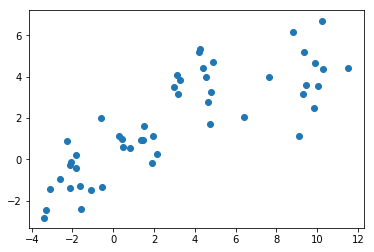

In [4]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

---
### Agglomerative Clustering
We will start by clustering the random data points we just created.

The <b> AgglomerativeClustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>

In [5]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

Fit the model with <b> X2 </b> and <b> y2 </b> from the generated data above.

In [6]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func=<function mean at 0x7f0e4842fd90>)

Run the following code to show the clustering! <br>
Remember to read the code and comments to gain more understanding on how the plotting works.

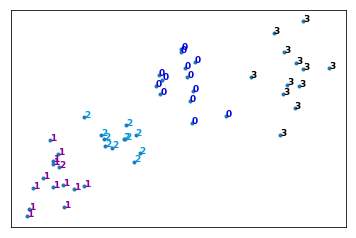

In [7]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

---
### Dendrogram Associated for the Agglomerative Hierarchical Clustering
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [8]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.24987322 0.60436456 ... 0.36010288 0.31232209 0.43082676]
 [0.24987322 0.         0.83238491 ... 0.5483152  0.07677995 0.56363829]
 [0.60436456 0.83238491 0.         ... 0.31343118 0.90488291 0.40876829]
 ...
 [0.36010288 0.5483152  0.31343118 ... 0.         0.62429714 0.14339794]
 [0.31232209 0.07677995 0.90488291 ... 0.62429714 0.         0.64005908]
 [0.43082676 0.56363829 0.40876829 ... 0.14339794 0.64005908 0.        ]]


Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>

In [9]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

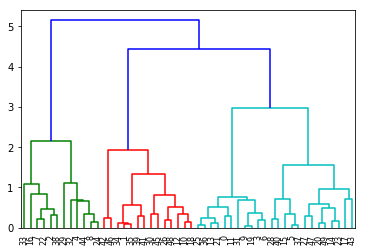

In [10]:
dendro = hierarchy.dendrogram(Z)

# Weather Station Clustering 

## Hierarchical Clustering using python & scikit-learn¶

Lets import all the libraries that we need.

In [11]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.preprocessing import normalize
import pylab
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot 
%matplotlib inline

KeyError: 'PROJ_LIB'

### About the dataset

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

### 1-Download data into your Data Scientist Workbench

In [12]:
!wget -O weather-stations20140101-20141231.csv https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv

--2018-10-03 13:43:13--  https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197, 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv [following]
--2018-10-03 13:43:13--  https://ibm.ent.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.26.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.26.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!Q_VDsNtq5hlYTbmF98vIN0YooT7_DSAlIRSUX2Isc_2MF02bdSm0FLepUPffVMzaX71LwSN3AxktIMFQZIUS9rya2LhIFFeYt0By46aqZZyCw-Ik_V7Zt8V-AOUXHesWBB99pD58hxyG3V_vgwHtdpfWevtLnsTGegDjJrn6tLhYe9S1fVZRkAzFf1uf3DL3NmzFqWE6h1Mq3CE8A733ry3rqmzAa6Hs5zHkAM_2p2O74Vb8R2_7ZLXCYCpVlA_ZWo102Z

### 2- Load the dataset

In [13]:
filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (1341, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### 3- Data Cleaning

In [14]:
pdf = pdf[pd.notnull(pdf["Tm"]) & np.isfinite(pdf['Tm'])]
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ",pdf.size)
pdf.head(10)

Shape of dataset after cleaning:  31400


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
5,GALIANO NORTH,48.985,-123.573,BC,8.9,7.0,NaN,13.5,7.0,2.0,...,7.0,NaN,0.0,10.0,NaN,NaN,NaN,191.7,0.0,10130MN
6,MALAHAT,48.575,-123.530,BC,7.2,1.0,NaN,12.7,1.0,2.2,...,10.0,NaN,NaN,12.0,NaN,NaN,NaN,290.8,0.0,1014820
7,NORTH COWICHAN,48.824,-123.719,BC,7.7,0.0,NaN,14.7,0.0,-2.6,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,288.8,0.0,1015630
8,NORTH PENDER ISLAND,48.764,-123.287,BC,8.6,1.0,NaN,14.0,1.0,2.0,...,1.0,NaN,0.0,13.0,NaN,NaN,NaN,253.6,0.0,1015638
9,RACE ROCKS,48.298,-123.531,BC,9.6,0.0,NaN,15.6,0.0,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.7,0.0,1016640


### 4- Data Visualization

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = (14,10)

llon = -140
ulon = -50
llat = 40
ulat = 65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm'] = xs.tolist()
pdf['ym'] = ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



KeyError: 'PROJ_LIB'

### 5- Data Sampling

In [16]:
hpdf = pdf.sample(frac=0.03, replace=False).reset_index(drop=True)
print ("Shape of sampled dataset: ", hpdf.shape)
hpdf.head()

Shape of sampled dataset:  (36, 27)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym
0,SQUAMISH AIRPORT,49.783,-123.161,BC,7.1,0.0,NaN,16.0,0.0,-2.2,...,0.0,11.0,NaN,NaN,NaN,304.6,0.0,10476F0,1.872410e+06,1.541110e+06
1,WILLIAM HEAD,48.340,-123.539,BC,9.2,1.0,3.0,14.0,1.0,3.5,...,0.0,14.0,NaN,NaN,NaN,238.6,0.0,1018935,1.830379e+06,1.296211e+06
2,RED PINES,47.439,-65.598,NB,-16.7,0.0,NaN,-1.2,0.0,-35.2,...,100.0,20.0,NaN,NaN,NaN,971.4,0.0,8104295,8.273121e+06,1.146799e+06
3,PICKLE LAKE A,51.446,-90.214,ON,-23.2,0.0,NaN,-6.7,0.0,-36.3,...,44.0,NaN,NaN,NaN,NaN,1154.5,0.0,6016529,5.535948e+06,1.832572e+06
4,DAUPHIN CS,51.100,-100.057,MB,-19.4,0.0,NaN,0.2,0.0,-36.1,...,10.0,3.0,NaN,NaN,NaN,1048.0,0.0,5040681,4.441457e+06,1.771075e+06


### 6- Data Clustering using average temperature

In [17]:
Temper = np.asarray(hpdf['Tm'])
nx = normalize(Temper.astype(float).reshape(-1, 1), axis=0)
D = scipy.zeros([nx.size,nx.size])
for i in range(nx.size):
    for j in range(nx.size):
        D[i,j] = abs(nx[i] - nx[j])
Y = sch.linkage(D, method='centroid')

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


### 7- Plot the first dendrogram

/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


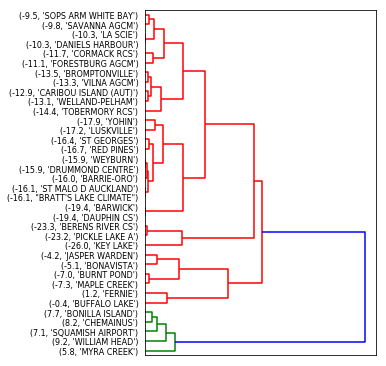

In [18]:
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
lb = zip(map(lambda x: round(x,2),Temper[Z1['leaves']]),hpdf['Stn_Name'][Z1['leaves']])
ax1.set_yticklabels(lb)
fig.show()

### 8-Clustering based on location and temperature

In [19]:
#Normalization
from sklearn.preprocessing import normalize
numpyMatrix = hpdf[['Tm','Tn','Tx','xm','ym']].as_matrix()
norp = normalize(numpyMatrix, axis=0)
norp[0:5]

array([[ 0.08510571, -0.01302549,  0.34363418,  0.05297115,  0.15159124],
       [ 0.11027783,  0.02072238,  0.30067991,  0.05178206,  0.12750176],
       [-0.20017823, -0.20840789, -0.02577256,  0.2340495 ,  0.11280485],
       [-0.27809191, -0.21492064, -0.14389681,  0.15661391,  0.18026088],
       [-0.23254237, -0.2137365 ,  0.00429543,  0.12565037,  0.17421165]])

In [20]:
leng = norp.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(norp[i], norp[j])

### 9-Visualization dendrogram.

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


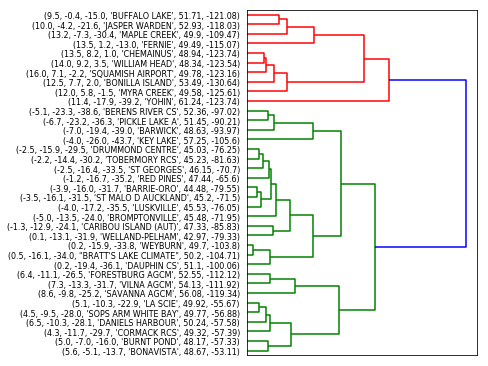

In [21]:
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
#ax1.set_yticks([])
lb=zip(map(lambda x: round(x,2),hpdf.Tx[Z1['leaves']]), \
       map(lambda x: round(x,2),hpdf.Tm[Z1['leaves']]), \
       map(lambda x: round(x,2),hpdf.Tn[Z1['leaves']]), \
       hpdf['Stn_Name'][Z1['leaves']],\
       map(lambda x: round(x,2),hpdf.Lat[Z1['leaves']]), \
       map(lambda x: round(x,2),hpdf.Long[Z1['leaves']]) \
      )
ax1.set_yticklabels(lb)
fig.show()

### 10- Clustering results (Labels)

In [22]:
labels = sch.fcluster(Y, 0.9*D.max(), 'distance')
hpdf["Clus_hier"]=labels-1
clusterNum=labels.max()
print (hpdf.Clus_hier)

0     4
1     4
2     2
3     3
4     2
5     0
6     2
7     2
8     5
9     5
10    3
11    4
12    2
13    1
14    4
15    2
16    2
17    3
18    3
19    2
20    2
21    0
22    1
23    0
24    2
25    1
26    2
27    5
28    4
29    0
30    2
31    2
32    5
33    6
34    0
35    0
Name: Clus_hier, dtype: int32


### 11-Visualization of clusters

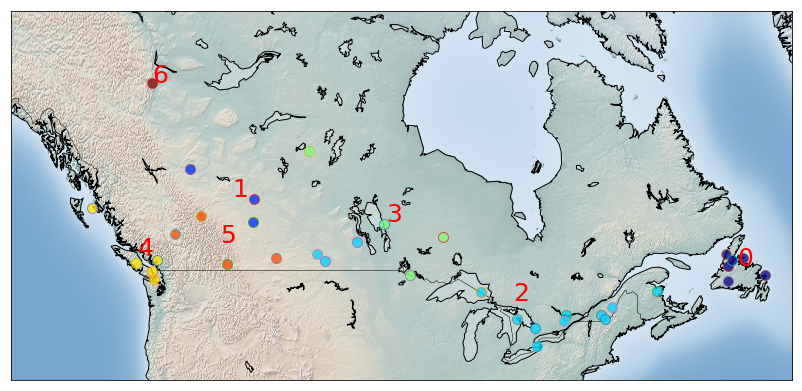

In [23]:
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for index,row in hpdf.iterrows():
    #print row.xm, row.ym , colors[np.int(row.Clus_hier)]
    my_map.plot(row.xm, row.ym, markerfacecolor =colors[np.int(row.Clus_hier)],  marker='o', markersize= 10, alpha = 0.75)
for i in range(clusterNum): 
    cluster=hpdf[["Stn_Name","Tm","xm","ym","Clus_hier"]][hpdf.Clus_hier==i]
    cenx=np.mean(cluster.xm) 
    ceny=np.mean(cluster.ym) 
    plt.text(cenx,ceny,str(i), fontsize=25, color='red',)
    #print "Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm))

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​